
***

# Calcul Matriciel
## TP4.Spectra
***
***
The main goal of this pratical is to use the spectrum of some matrices associated with (simple non-oriented) graphs  
***
***
A few ground rules for your report:
* _your code must be clear, commented and use explicit variable names_
* _every algorithm must be tested on a few examples which show the different use cases_
* _markdown comments and examples must be provided, and the report should be self-contained_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')


***
## <font color=blue>First steps with numpy.linalg and NetworkX</font> ##
***





**To Do**

**_question 1_**

Explain the meaning of the line <tt>eigenval,eigenvect=np.linalg.eig(A)</tt>. Compare with <tt>np.linalg.eigvals(A)<tt> and similar methods.


**_question 2_**

Using networkX [documentation](https://networkx.github.io/documentation/networkx-1.7/reference/generated/networkx.convert.from_numpy_matrix.html) create a (NetworkX) graph from its (numpy) adjcency matrix and _vice-versa_.


**_question 3_**

From a (numpy) adjacency matrix, create the laplacian matrix associated with the graph (without using NetworkX).


In [2]:
#question 1
A=np.array(
[[0,1,0,0,1], 
[1,0,1,1,0], 
[0,1,0,0,0], 
[0,1,0,0,1],
[1,0,0,1,0]])

np.linalg.eig(A)
np.linalg.eigvals(A)



array([-2.13577921e+00,  2.13577921e+00, -6.62153447e-01,  1.46106936e-16,
        6.62153447e-01])

```linalg.eig``` permet de donner les vecteurs propres et ```linalg.eigval``` permet d'obtenir les valeurs propres issue de ces vecteurs

graph G: Graph with 5 nodes and 5 edges
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0.]]
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
[[ 2 -1  0  0 -1]
 [-1  3 -1 -1  0]
 [ 0 -1  1  0  0]
 [ 0 -1  0  2 -1]
 [-1  0  0 -1  2]]


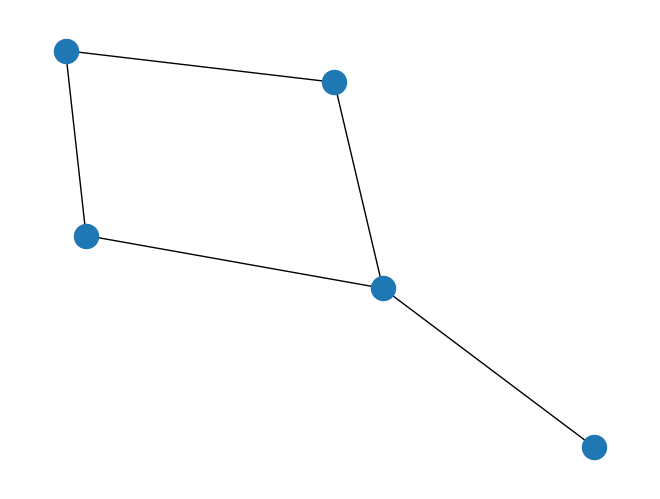

In [3]:
#question 2

G=nx.from_numpy_array(A)

def Degree(M):
    return np.diag(np.diag(np.matmul(M,M)))

print("graph G:",G)
print(nx.to_numpy_array(G))
nx.draw(G)

#question 3

def adjTolaplacian(M):
    """
         Returns the laplacian matrix from an adjacency matrix.

        :param A: the adjacency matrix
        :type A: a matrix (two dimensionnal np array) containing only integers
        :return: the  laplacian matrix
        :rtype: a matrix (two dimensionnal np array) containing only integers
    """ 
    return Degree(M)-M
print(Degree(A))
print(adjTolaplacian(A))
    

45
[10 25 45]


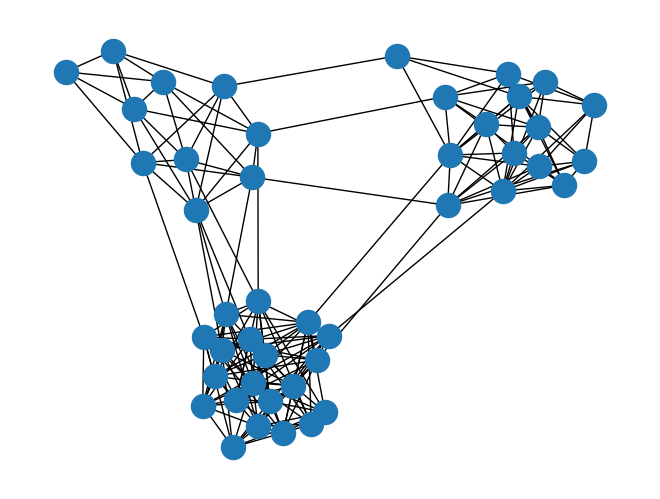

In [4]:
#SBM homebrew

def SBM_ensibs(array,pin,pout):
    n=np.sum(array)
    ncum=np.cumsum(array)
    
    print(n)
    A=np.zeros((n,n),int)
    print(ncum)
    
    ki=0 #current connected component
    for i in range(n):
        if i>=ncum[ki]:
            ki=ki+1
            #print("i,ki",i,ki)
        kj=ki #current connected component
        for j in range(i+1,n):
            if j>=ncum[kj]:
                kj=kj+1
                #print("i,ki,j,kj",i,ki,j,kj)
               
            if ki==kj:
                A[i][j]=np.random.binomial(1,pin)
                A[j][i]=A[i][j]
            else:
                A[i][j]=np.random.binomial(1,pout)
                A[j][i]=A[i][j]          
    return A

ASBM=SBM_ensibs([10,15,20], 0.5, 0.02)

GSBM=nx.from_numpy_array(ASBM)


#print(ASBM)
nx.draw(GSBM,pos=nx.spring_layout(GSBM))

***
# <font color=blue>Applications of algebraic graph theory to practical graphs</font> ##
***


Our running motivation in this part of the pratical will be to understand some graph, which is supposed to represent for instance some social network.



A good toy model for this is the **Stochastic block model**.
Using your own words, explain briefly what is this model.

In [5]:
# Stochastic block model
np.random.seed(13)

G = nx.random_partition_graph([10,15,20], 0.5, 0.02)




This model can be drawn in a nice way, that makes structure clear:

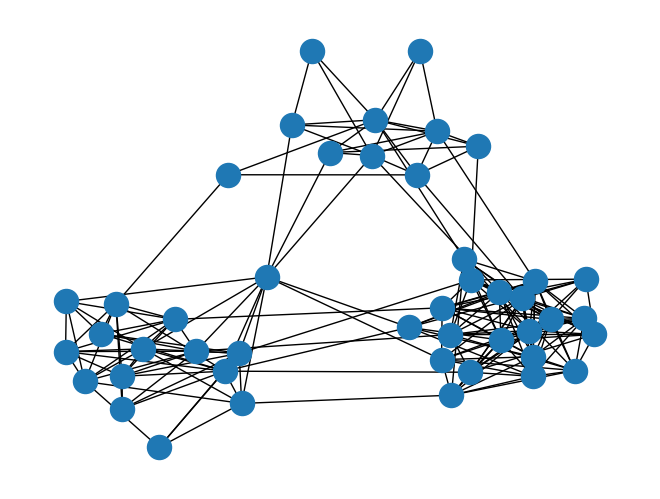

In [6]:
nx.draw(G)
plt.show()

Since we know the way the graph has been constructed, we can highlight some structural features, called clusters:

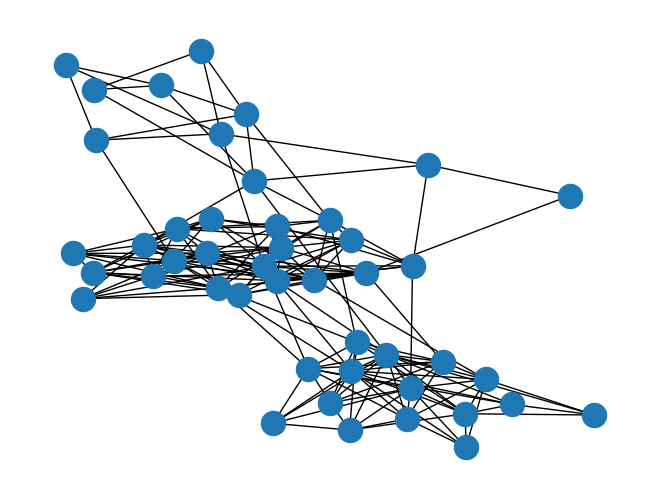

In [7]:
# The previous graph (stochastic block model) with the clusters (blocks) as labels
M = nx.to_numpy_array(G)


np.random.seed(42)
def sbm_graph(clusters, p_in, p_out):
    np.random.seed(13)

    G = nx.random_partition_graph(clusters, p_in, p_out)
    u = 0
    for k,s in enumerate(np.cumsum(clusters)):
        while u < s:
            G.nodes[u]['cluster'] = k
            u += 1
    return G

G = sbm_graph([10,15,20], 0.5, 0.02)
nx.draw(G,pos=nx.spring_layout(G))

plt.show()
# Show the previous graph with colored clusters

def show_with_clusters(G):
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    nb_colors = len(colors)
    clusters = nx.get_node_attributes(G, 'cluster')
    node_colors = [colors[clusters[u] % nb_colors] for u in G]
    nx.draw(G, node_color = node_colors,pos=nx.spectral_layout(G))
    plt.show()
    
    


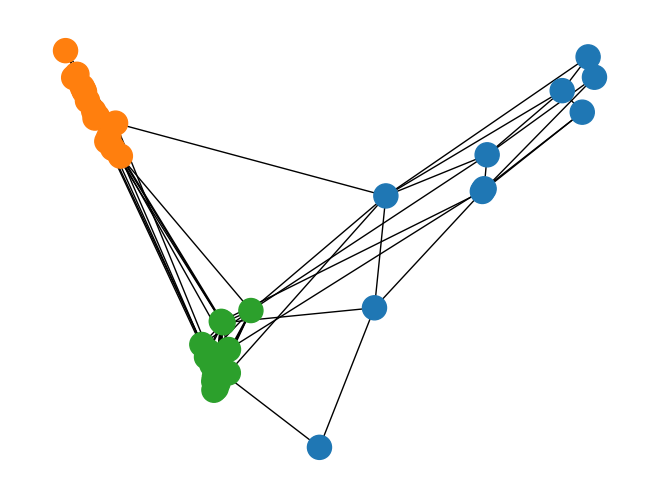

In [8]:
show_with_clusters(G)
plt.show()

However, when one studies a graph, all this cannot be used directly. Using spectral graph theory we will show how to infer this features.

***
## <font color=blue>Spectral drawing</font> ##
***

how to draw a graph using its eigenvectors:


**To Do:**

**_question 1_**

Test a few of the different nx.draw_networkx(graph, pos=layout) layout implemented on NetworkX. Our aim is to implement a spectral drawing of the graph.


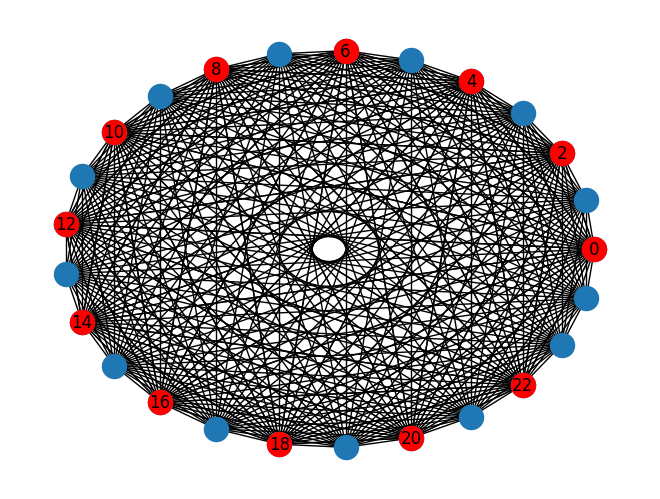

In [9]:
#TODO 1
# Circular
G = nx.complete_graph(25)

pos = nx.circular_layout(G)

nx.draw(G, pos=pos)  # Draw the original graph

# Draw a subgraph, reusing the same node positions

def RB (M):
    M = nx.to_numpy_array(M)
    n = np.shape(M)[0]
    L = []
    for i in range(n//2):
        L.append(2*i)
    return L

nx.draw_networkx(G.subgraph(RB(G)), pos=pos, node_color="red")

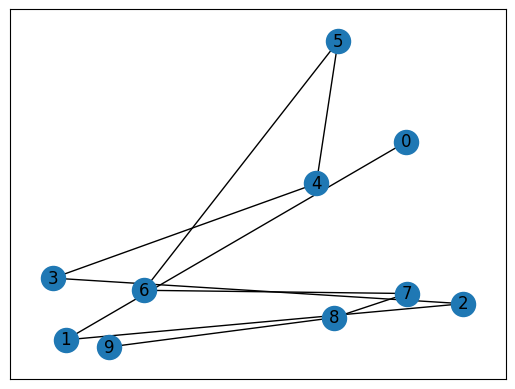

In [10]:
# Random
G = nx.path_graph(10)
pos = nx.random_layout(G)
nx.draw_networkx(G,pos=pos)

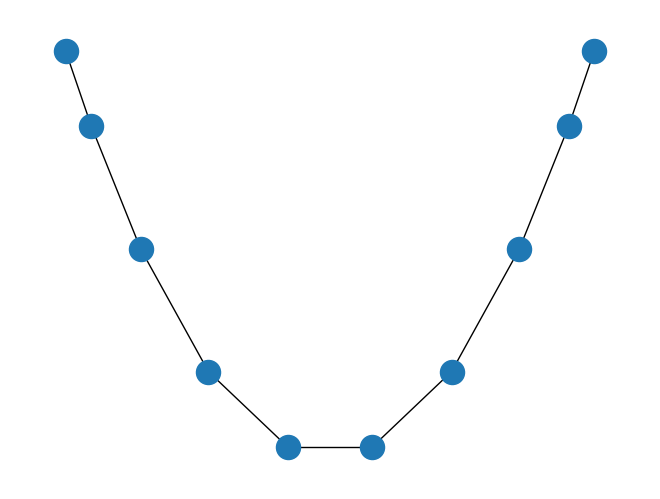

In [11]:
# Spectral
G = nx.path_graph(10)
pos = nx.spectral_layout(G)
nx.draw(G,pos=pos)

**_question 2_**

Write a function which draw the graph according to its eigenvalue. That is, the node $i$ should be at position $(u_1[i],u_2[i])$, where $u_i$ is the i-th eigenvector of the Laplacian matrix (with $u_0$ the constant vector associated with the eigenvalue $0$).

_be careful on the format of the output of np.linalg.eig(L)_

In [12]:
#bullgraph
A=np.array([[0 , 1 , 0 , 0 , 0 ],[1 , 0 , 1 , 1 , 0 ],[0 , 1 , 0 , 1 , 0 ],[0 , 1 , 1 , 0 , 1 ],[0 , 0 , 0 , 1 , 0]])

print(np.linalg.eig(A))    


def spectralDrawing(G):
    """
         Draws the graph according its second and third (laplacian) eigenvalues

        :param G: a graph 
        :type G: a networkx graph
    """         

    return -1

G=nx.from_numpy_array(A)
spectralDrawing(G)

EigResult(eigenvalues=array([ 2.30277564e+00,  6.18033989e-01, -1.48560052e-17, -1.61803399e+00,
       -1.30277564e+00]), eigenvectors=array([[ 2.45399318e-01, -6.01500955e-01, -5.77350269e-01,
         3.71748034e-01, -3.26260389e-01],
       [ 5.65099570e-01, -3.71748034e-01,  1.41249194e-16,
        -6.01500955e-01,  4.25044087e-01],
       [ 4.90798636e-01,  1.01672595e-17,  5.77350269e-01,
         5.79249309e-16, -6.52520778e-01],
       [ 5.65099570e-01,  3.71748034e-01,  6.76152795e-17,
         6.01500955e-01,  4.25044087e-01],
       [ 2.45399318e-01,  6.01500955e-01, -5.77350269e-01,
        -3.71748034e-01, -3.26260389e-01]]))


-1

**_bonus question_**

Try to improve your spectral drawing

In [13]:
def spectralDrawing2(G):
    """
         Draws the graph according its second and third (laplacian) eigenvalues

        :param G: a graph 
        :type G: a networkx graph
    """         

    return -1


spectralDrawing2(G)



-1

**_bonus question 2_**

We know that two graphs can be isospectral. Is this a problem for (spectral) graph drawing? Illustrate your answer.

**_bonus question 3_**

win http://mozart.diei.unipg.it/gdcontest/



***
## <font color=blue>Clustering</font>
***



the spectrum of the adjacency matrix can be used to group some vertices. The basic idea is that vertices sharing lots of edges shouldbe grouped together. Eigenvectors somehow give a measure of this idea: 

**To Do:**
**_question 1_**


Using the following code extract, write a function <tt> initializeCluster </tt> that adds a field 'cluster' to a given graph. Initialy this field should be 0.

_the networkx graphs work more or less as dictionaries_*


In [14]:
# Stochastic block model
G = nx.random_partition_graph([10,15,20], 0.5, 0.02)

# The previous graph (stochastic block model) with the clusters (blocks) as labels

def sbm_graph(clusters, p_in, p_out):
    """
         Adds a field 'cluster' to a SBM graph

        :param G: a SMB graph 
        :type G: a networkx graph
        :return: a graph 
        :rtype: a networkx graph        
    """        
    G = nx.random_partition_graph(clusters, p_in, p_out)

    return G

G = sbm_graph([10,15,20], 0.5, 0.02)

# Show the previous graph with colored clusters

def show_with_clusters(G):
    """
        Plots a graph with clusters coloured

        :param G: a graph with cluster field 
        :type G: a networkx graph        
    """        
        
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    nb_colors = len(colors)
    clusters = nx.get_node_attributes(G, 'cluster')
    node_colors = [colors[clusters[u] % nb_colors] for u in G]
    nx.draw(G, node_color = node_colors)
    plt.show()
    
    
#show_with_clusters(G)

In [15]:
#TODO

def initializeCluster(G):
    """
         Adds a field 'cluster' to the graph

        :param G: a graph 
        :type G: a networkx graph
        :return: a graph 
        :rtype: a networkx graph        
    """        
    

    return G

#G = sbm_graph([10,15], 0.5, 0.02)

initializeCluster(G)
#show_with_clusters(G) 

**_question 2_**


Use the second smallest eigenvector of G (usually called the Fiedler eigenvector) to create two cluster in a given graph. The first cluster should be the vertices which have negative weights in the eigenvector.

Plot these clusters.


_be careful on the format of the output of np.linalg.eig(L) and the ordering of eigenvalues/vectors_

In [16]:
def spectralCluster(G):
    """
        Fills the field 'cluster' according to the Fiedler eigen-weights

        :param G: a graph 
        :type G: a networkx graph
        :return: a graph 
        :rtype: a networkx graph        
    """        


    return G


G = sbm_graph([10,15,20], 0.5, 0.02)

A=np.array( [[0 , 1 , 0 , 0 , 1 , 0 ],
 [ 1 , 0 , 1 , 0 , 1 , 0 ],
 [ 0 , 1 , 0 , 1 , 0 , 0 ],
 [ 0 , 0 , 1 , 0 , 1 , 1 ],
 [ 1 , 1 , 0 , 1 , 0 , 0 ],
 [ 0 , 0 , 0 , 1 , 0 , 0]])


G = sbm_graph([10,15,20], 0.5, 0.02)
#G = nx.from_numpy_array(A)

initializeCluster(G)
spectralCluster(G)
#show_with_clusters(G)  


**_bonus question_**

generalize this approach to more that 2 clusters (one can start with $2^k$ clusters, and work on subgraphs).


**_bonus question 2_**

_a more involved method use the k-mean clustering (implemented for instance in python sklearn as a subroutine)_

<tt> spectral clustering
    
    
from sklearn.cluster import KMeans

Input:  Graph, number $k$ of clusters desired

* Compute the Laplacian matrix $L$.
* Compute the first $k+1$ eigenvectors $(u_1,,...,,u_k)$ of $L$.
* For $i=1,...,n$ , let $ y_i \in \mathbb{R}^k$ be the vector corresponding to the i-th coordinatesof the $u_k$'s
* Cluster the points $(y_i)_{i=1,...,n}$ with the k-means algorithm into clusters $C_1,...,C_k$.
    
Output:  Clusters $A_1,...,A_k$ with $ A_i=\{j|y_j\in C_i\}$
    
    
</tt>

implement this clustering.

# Bonus: $0$-multiplicity of the oriented Laplacian

We've seen in the lecture that the multiplicity of the eigenvalue $0$ is equal to the number of connected components in an undirected graph. 

Test some examples and propose a interpretation in the directed case.

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


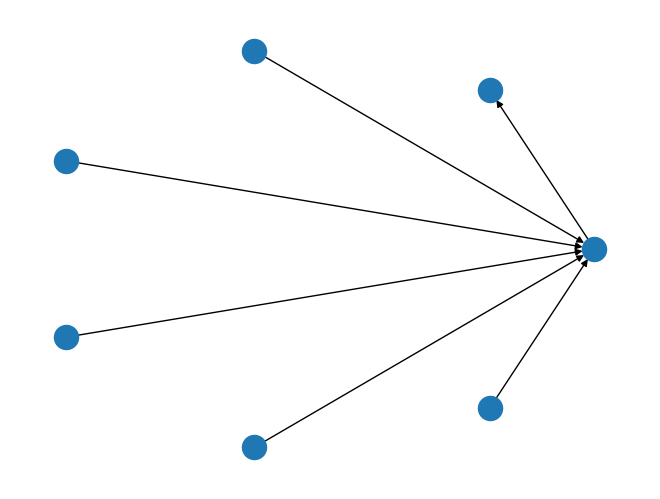

In [17]:
#try more example than just this!
def oriented_star(n):
    A=np.zeros((n+1,n+1))
    for i in range(1,n+1):
        if (np.random.binomial(1,.5)):
            
            A[0][i]=1
        else:
            A[i][0]=1                
    return A

A=oriented_star(6)
print(A)
G=nx.from_numpy_array(A,create_using=nx.DiGraph)
nx.draw(G,pos=nx.circular_layout(G),arrows=True)